In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import contractions
import spacy

# import spaCy English 
nlp = spacy.load("en_core_web_sm")

## Data Wrangling

In [8]:
# import data
df1 = pd.read_csv(r'data/raw_data/hatespeech_id_label_text.csv', lineterminator='\n')
df2 = pd.read_csv(r'data/raw_data/labeled_data.csv', lineterminator='\n')
df3 = pd.read_csv(r'data/raw_data/NAACL_SRW_2016_text.csv', lineterminator='\n')
df4 = pd.read_csv(r'data/raw_data/train_E6oV3lV.csv', lineterminator='\n')

In [9]:
# view first dataframe
df1.head()

,Unnamed: 0,id,label,text
0,0,850490912954351616,abusive,Alex Brosas another idiot #ALDUBKSGoesToUS ht...
1,1,848791766853668864,abusive,"RT @ItIzBiz: as Nancy Reagan would say, 'just ..."
2,2,850010509969465344,normal,RT @MailOnline: The Nazi death gas so horrific...
3,3,850433664890544128,hateful,I hate er chase because if the Bitch that work...
4,4,848619867506913282,abusive,RT @chevleia: don't hmu when u get tired of ur...


In [10]:
# drop everything but label and text
df1 = df1[['label', 'text']]

# change column names to 'label' and 'tweet'
df1.columns = ['label', 'tweet']

# print number of NaNs
print(f'There are {df1.isna().sum().sum()} missing values.')

# change label to 1 if hate speech and 0 otherwise
df1.label = df1.label.apply(lambda x: 1 if x == 'hateful' else 0)

# view updated dataframe
df1.head()

There are 0 missing values.


,label,tweet
0,0,Alex Brosas another idiot #ALDUBKSGoesToUS ht...
1,0,"RT @ItIzBiz: as Nancy Reagan would say, 'just ..."
2,0,RT @MailOnline: The Nazi death gas so horrific...
3,1,I hate er chase because if the Bitch that work...
4,0,RT @chevleia: don't hmu when u get tired of ur...


In [11]:
# view second dataframe
df2.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [12]:
# drop everything but class and tweet 
df2 = df2[['class', 'tweet']]

# change column names to 'label' and 'tweet'
df2.columns = ['label', 'tweet']

# print number of NaNs
print(f'There are {df2.isna().sum().sum()} missing values.')

# change label to 1 if hate speech and 0 otherwise
df2.label = df2.label.apply(lambda x: 1 if x == 0 else 0)

# view updated dataframe
df2.head()

There are 0 missing values.


,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,0,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,0,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [13]:
# view third dataframe
df3.head()

,Unnamed: 0,id,label,text
0,0,572341498827522049,racism,Drasko they didn't cook half a bird you idiot ...
1,1,572341498827522049,racism,Drasko they didn't cook half a bird you idiot ...
2,2,572341498827522049,none,Drasko they didn't cook half a bird you idiot ...
3,3,572341498827522049,none,Drasko they didn't cook half a bird you idiot ...
4,4,572340476503724032,racism,Hopefully someone cooks Drasko in the next ep ...


In [14]:
# drop everything but label and text
df3 = df3[['label', 'text']]

# change column names to 'label' and 'tweet'
df3.columns = ['label', 'tweet']

# print number of NaNs
print(f'There are {df3.isna().sum().sum()} missing values.')

# change label to 1 if hate speech and 0 otherwise
df3.label = df3.label.apply(lambda x: 0 if x == 'none' else 1)

# view updated dataframe
df3.head()

There are 0 missing values.


,label,tweet
0,1,Drasko they didn't cook half a bird you idiot ...
1,1,Drasko they didn't cook half a bird you idiot ...
2,0,Drasko they didn't cook half a bird you idiot ...
3,0,Drasko they didn't cook half a bird you idiot ...
4,1,Hopefully someone cooks Drasko in the next ep ...


In [15]:
# view fourth dataframe
df4.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [16]:
# drop everything but label and tweet
df4 = df4[['label', 'tweet']]

# print number of NaNs
print(f'There are {df4.isna().sum().sum()} missing values.')

# view updated dataframe
df4.head()

There are 0 missing values.


,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [17]:
# combine all four data frames into one
df = pd.concat([df1, df2, df3, df4])

# cast all labels as ints
df.label = df.label.astype(int)

# reset the index
df.reset_index(drop=True, inplace=True)

# drop duplicate rows 
print(f'Dropped {df.duplicated().sum()} duplicate rows.')

# drop duplicate tweets with contradictory labels
contradictory_tweets = df.groupby('tweet').label.nunique()[(df.groupby('tweet').label.nunique() > 1)].index
contradictory_index = df[df.tweet.isin(contradictory_tweets)].index
df.drop(index=contradictory_index, inplace=True)
print(f'Dropped {len(contradictory_index)} tweets with contradictory labels.')

# get number of unique rows left 
print(f'The full data set now contains {len(df)} unique, labeled tweets.')

# view data 
df.head()

Dropped 4292 duplicate rows.
Dropped 838 tweets with contradictory labels.
The full data set now contains 120895 unique, labeled tweets.


,label,tweet
0,0,Alex Brosas another idiot #ALDUBKSGoesToUS ht...
1,0,"RT @ItIzBiz: as Nancy Reagan would say, 'just ..."
2,0,RT @MailOnline: The Nazi death gas so horrific...
3,1,I hate er chase because if the Bitch that work...
4,0,RT @chevleia: don't hmu when u get tired of ur...


In [18]:
def clean_tweet(tweet):
    # Use contractions package to split contractions
    tweet = contractions.fix(tweet.lower())
    # Use regex to remove special characters, numbers, mentions, emojis, websites, RT preambles
    tweet = " ".join(re.sub(r"(\brt\b)|(@[a-z0-9]+)|(http[\S]+)|([^a-z])", " ", tweet).split())
    # Use spaCy nlp to perform lemmatization
    doc = nlp(tweet)
    tweet = " ".join([token.lemma_ for token in doc if token.is_stop == False])
    return tweet 

df['clean_tweet'] = df.tweet.apply(clean_tweet)
df.head()

,label,tweet,clean_tweet
0,0,Alex Brosas another idiot #ALDUBKSGoesToUS ht...,alex brosas idiot aldubksgoestous
1,0,"RT @ItIzBiz: as Nancy Reagan would say, 'just ...",nancy reagan fucking like
2,0,RT @MailOnline: The Nazi death gas so horrific...,nazi death gas horrific hitler fear
3,1,I hate er chase because if the Bitch that work...,hate er chase bitch work literally evil
4,0,RT @chevleia: don't hmu when u get tired of ur...,hmu tired ur bore hoe ur bore


In [8]:
# Since some tweets contain only stop words, their clean version is NaN
# Let's drop such tweets now
print(f'Dropped {df.isna().sum().sum()} tweets that contained only stop words.')
df.dropna(inplace=True)

Dropped 353 tweets that contained only stop words.


In [9]:
# Save the clean, wrangled data to csv 
df.to_csv('data/clean_data.csv', index=False)

## Data Exploration

The data contains 120895 labeled tweets, of which 8302 (6.87%) are labeled as hate speech 
and 112593 (93.13%) are labeled as not hate speech. As you can see, the data is highly imbalanced!


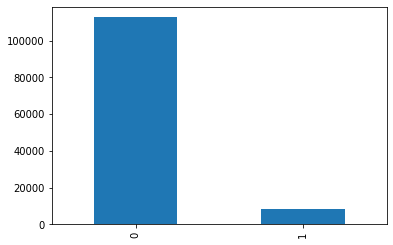

In [3]:
# Calculate label distribution
hate_count = df.label.sum()
hate_percent = np.round(100 * hate_count / len(df.label), 2)
not_hate_count = len(df.label) - df.label.sum()
not_hate_percent = np.round(100 * not_hate_count / len(df.label), 2)

# Print label distribution
print(f"The data contains {len(df)} labeled tweets, of which {hate_count} ({hate_percent}%) are labeled as hate speech \nand {not_hate_count} ({not_hate_percent}%) are labeled as not hate speech. As you can see, the data is highly imbalanced!")

# Visualize label distribution
df.label.value_counts().plot.bar();

In [4]:
# Calculate top word frequencies using BoW embeddings (which make it faster to compute for this much data)
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(min_df=100)

# Get top words across all tweets
overall_words = pd.DataFrame(bow.fit_transform(df.clean_tweet).toarray(), 
                             columns=bow.get_feature_names()) \
              .sum() \
              .sort_values(ascending=False)
print("Top ten overall tweet words:")
print(overall_words[:10])
print()

# Get top words for hate tweets
hate_words = pd.DataFrame(bow.fit_transform(df[df.label == 1].clean_tweet).toarray(), 
                          columns=bow.get_feature_names()) \
           .sum() \
           .sort_values(ascending=False)
print("Top ten hate tweet words:")
print(hate_words[:10])
print()

# Get top words for not hate tweets
not_hate_words = pd.DataFrame(bow.fit_transform(df[df.label == 0].clean_tweet).toarray(), 
                              columns=bow.get_feature_names()) \
               .sum() \
               .sort_values(ascending=False)
print("Top ten not hate tweet words:")
print(not_hate_words[:10])
print()

# Print overlapping top tens
print("Words shared between top ten hate and top ten not hate:")
print(set(hate_words[:10].index).intersection(not_hate_words[:10].index))

Top ten overall tweet words:
bitch      12440
like        8270
amp         6784
love        5663
day         5386
fucking     4808
fuck        4764
hoe         4535
get         4481
good        4281
dtype: int64

Top ten hate tweet words:
sexist    887
woman     808
like      701
mkr       657
amp       552
hate      515
man       433
bitch     416
girl      400
people    359
dtype: int64

Top ten not hate tweet words:
bitch      12024
like        7569
amp         6232
love        5540
day         5284
fucking     4550
fuck        4434
hoe         4404
get         4276
good        4093
dtype: int64

Words shared between top ten hate and top ten not hate:
{'like', 'amp', 'bitch'}


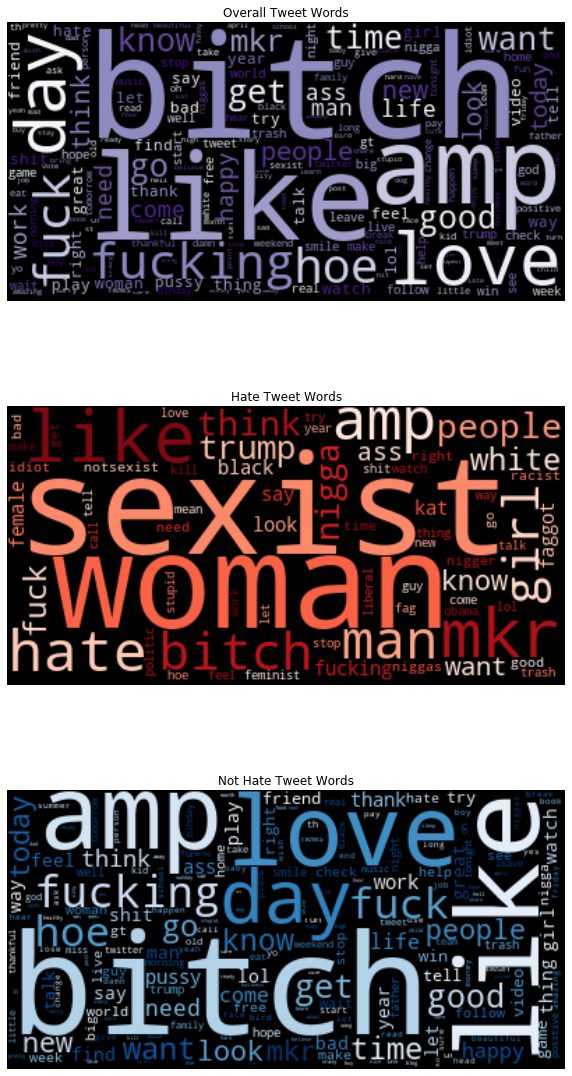

In [27]:
# Use word frequencies to generate word clouds
from wordcloud import WordCloud
fig = plt.figure(figsize=(10,20))

# Word cloud for overall words
plt.subplot(311);
wordcloud = WordCloud(colormap='Purples').generate_from_frequencies(overall_words)
plt.imshow(wordcloud, interpolation="bilinear");
plt.axis("off");
plt.title("Overall Tweet Words");

# Word cloud for hate words
plt.subplot(312);
wordcloud = WordCloud(colormap='Reds').generate_from_frequencies(hate_words)
plt.imshow(wordcloud, interpolation="bilinear");
plt.axis("off");
plt.title("Hate Tweet Words");

# Word cloud for not hate words
plt.subplot(313);
wordcloud = WordCloud(colormap='Blues').generate_from_frequencies(not_hate_words)
plt.imshow(wordcloud, interpolation="bilinear");
plt.axis("off");
plt.title("Not Hate Tweet Words");

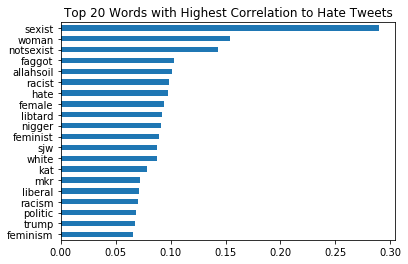

In [56]:
# Get top 20 words most highly correlated with hate speech using a quick BoW embedding 
bow = CountVectorizer(min_df=50)
tweet_bow = pd.DataFrame(bow.fit_transform(df.clean_tweet).toarray(), 
                         columns=bow.get_feature_names())
tweet_bow.corrwith(df.label).sort_values(ascending=False)[:20].sort_values().plot.barh(title='Top 20 Words with Highest Correlation to Hate Tweets');